In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [106]:
columnNames = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age" , "Y"]

In [107]:
diabetes = pd.read_csv("pima-indians-diabetes.csv" , names = columnNames)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Y                           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [109]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Y                           768
dtype: int64

In [110]:
diabetes.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [111]:
scaler = MinMaxScaler()

In [112]:
diabetes[diabetes.columns] = scaler.fit_transform(diabetes[diabetes.columns])
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [113]:
#Adding a new column for b parameter of m1.x1 + m2.x2 .. + b with all feature values to be 1
diabetes["x"] = [1 for i in range(768)]
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Y,x
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0,1


In [114]:
#Rearranging the columns
diabetes = diabetes[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age" , "x" , "Y"]]  
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x,Y
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,1.0


In [115]:
# Changing the Y column values from integer to float
diabetes.Y = diabetes.Y.astype(int)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x,Y
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1,1


In [116]:
#Seperating x and y and then applying train_test_split

Y = diabetes.Y
del diabetes["Y"]
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,x
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,1
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,1
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [177]:
#Logistic Function
def logit(x , m):
    z = (x*m).sum()
    return 1/(1 + math.exp(-z))

In [178]:
def predict (x_test , m):
    y_predict = np.array([])
    for i in range(len(x_test)):
        y_predict = np.append(y_predict , logit(x_test[i] , m))
    #Converting the predict function values to 0 or 1
    y_predict = (y_predict >= y_predict.mean()).astype(int)
    return y_predict

In [179]:
def score(x_test , y_test , m ):
    y_predict = predict(x_test , m)
    indicator = np.array((y_predict == y_test).astype(int))
    print(y_predict , y_test)
    print("Number of samples correctly predicted: " , indicator.sum() , " out of : " , len(y_test))
    score = ((indicator).sum())/len(x_test)
    return score
    

In [180]:
def cost_function(x_train , y_train , m):
    cost = 0
    for i in range(len(x_train)):
        cost += (y_train[i] * (math.log(logit(x_train[i] , m))) + (1 - y_train[i]) * ((math.log(1 - logit(x_train[i] , m)))))  
    return (-1/len(x_train))*cost

In [181]:
def gradient_step_runner(starting_m , x_train , y_train , learning_rate , num_of_iterations):
    m = starting_m
    m_0_list = np.array([])   #For graphical representaion of decreasing cost function
    cost_list = np.array([])
    initial_cf = cost_function(x_train , y_train , m)
    print("Intial Cost Function = " , initial_cf)
    for i in range(num_of_iterations):
        for j in range(len(x_train)):
            m = cal_step_gradient( x_train[j]  , y_train[j] , learning_rate , m)
        if(i % 10 == 0):
            m_0_list = np.append(m_0_list , m[0])
            cost_list = np.append(cost_list , cost_function(x_train , y_train , m))
    #Plotting a curve
    plt.scatter(m_0_list , cost_list)
    plt.plot(m_0_list , cost_list)
    plt.show()
    final_cf = cost_function(x_train , y_train , m)
    print("Final Cost Function = " , final_cf)
    return m

In [182]:
def cal_step_gradient( x , y , learning_rate , m):
    for i in range(len(m)):
        m[i] = m[i] - learning_rate * (logit(x , m) - y) * x[i]
    return m

In [183]:
X_train , X_test , Y_train , Y_test = train_test_split(diabetes , Y , test_size = 0.2)
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()
Y_train = Y_train.as_matrix()
Y_test = Y_test.as_matrix()

In [184]:
def run(X_train , Y_train):
    starting_m = np.array([0.0 for i in range(len(X_train[0]))])
    learning_rate = 0.01
    num_of_iterations = 1000
    m = gradient_step_runner(starting_m , X_train , Y_train , learning_rate , num_of_iterations)
    return m

Intial Cost Function =  0.69314718056


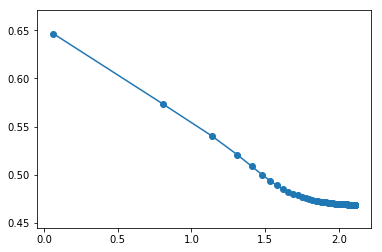

Final Cost Function =  0.46885769551
Final values of m [ 2.10694664  6.84075268 -1.87821773 -0.30839903 -1.01519508  5.86049753
  2.19936377  1.25308313 -7.72714282]


In [185]:
m = run(X_train , Y_train)
print("Final values of m" , m)

In [186]:
s = score(X_test , Y_test , m )
print("Score is : " , s)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0
 0 1 0 1 0 0] [0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0
 0 1 0 0 0 0]
Number of samples correctly predicted:  118  out of :  154
Score is :  0.766233766234


In [187]:
clf = LogisticRegression()

In [188]:
clf.fit(X_train , Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [189]:
Y_predict = clf.predict(X_test)

In [190]:
clf.score(X_test , Y_test)

0.7142857142857143